<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3: Transactional Databases - Representation, Creation, and Statistics**

## Installing the PAMI Library

In [1]:
!pip install pami

zsh:1: command not found: pip


## Creating Synthetic Transactional Databases

Generic

```python
from PAMI.extras.syntheticDataGenerator import TransactionalDatabase as db
  
obj = db.TransactionalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInTransaction,
        numItems=totalNumberOfItemsInADatabase,
        sep='\t' #default seperator
        )
obj.create() #creating the synthetic transactional database
obj.save(outputFileName) #save the file
transactionalDataFrame=obj.getTransactions() #reading the transactions into a dataframe

#printing stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [2]:
from PAMI.extras.syntheticDataGenerator import TransactionalDatabase as db

obj = db.TransactionalDatabase(
        databaseSize=100000,
        avgItemsPerTransaction=10,
        numItems=1000,
        sep='\t'
        )
obj.create()
obj.save('transactionalDatabase.csv')
#read the generated transactions into a dataframe
transactionalDataFrame=obj.getTransactions()
#stats
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 4.571674108505249
Memory (RSS): 86523904
Memory (USS): 58146816


## Deriving a Transactional Database from a DataFrame

### Generic



```python
from PAMI.extras.convert import DF2DB as alg

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='outputFileName.csv',
       condition='>=|>|==|!=|<=|<', thresholdValue=value
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [3]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 1000 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(1000, 4))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='transactionalDB.csv',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.01154470443725586
Memory (RSS): 128155648
Memory (USS): 93437952


## Knowing the Statistical Details

### Generic


#### *Detailed version*
```python
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()')
print(f'Database sparsity :{obj.getSparsity()}')
```

#### *Simplified version*

```python
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()
```

### Example 3

Database size (total no of transactions) : 100000
Number of items : 1000
Minimum Transaction Size : 1
Average Transaction Size : 10.02428
Maximum Transaction Size : 20
Standard Deviation Transaction Size : 5.726605493798224
Variance in Transaction Sizes : 32.79433842498425
Sparsity : 0.98997572


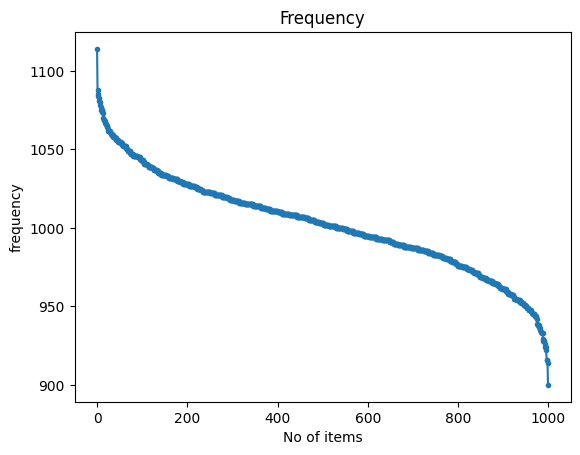

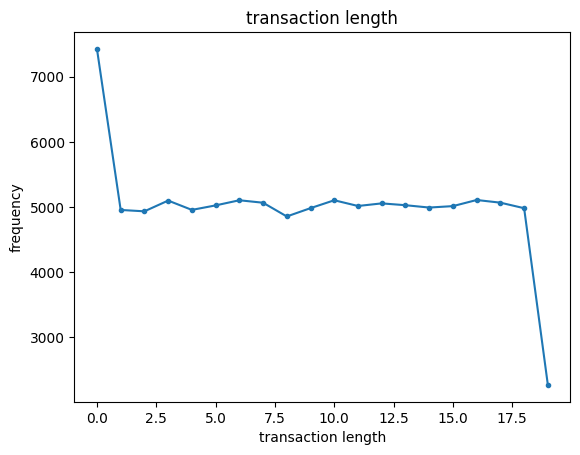

In [4]:
from PAMI.extras.dbStats import TransactionalDatabase as stat

obj = stat.TransactionalDatabase("transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()